[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Denis-R-V/TSR/blob/main/notebooks/1.dataset_analysis.ipynb#)

# Система распознавания дорожных знаков на датасете RTSD

## Анализ датасета RTSD

In [1]:
# если работаем в колабе - монтируем диск, ставим fiftyone и kaggle
try:
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install fiftyone -q
    !pip install kaggle -q
    
    colab=True
except:
    colab=False

In [4]:
import json
import os
import sys

import fiftyone as fo
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from pycocotools.coco import COCO

sys.path.append('../src')
from download_datasets import download_RTSD

%matplotlib inline

### Пути к данным

In [3]:
dataset_path = 'data/raw/RTSD' if colab else os.path.join('..', 'data', 'raw', 'RTSD')
data_prepared_path = '../content/drive/MyDrive/TSR/data/prepared' if colab else os.path.join('..', 'data', 'prepared')

In [4]:
# если работаем в колабе - скачиваем и распаковываем датасет
if colab==True:
    !mkdir ~/.kaggle
    !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
    
    !kaggle datasets download watchman/rtsd-dataset
    
    !mkdir -p data/raw/RTSD
    !unzip -q rtsd-dataset.zip -d ./data/raw/RTSD/
    !rm rtsd-dataset.zip
    !cp -r data/raw/RTSD/rtsd-frames/rtsd-frames/ data/raw/RTSD
    !rm -r data/raw/RTSD/rtsd-frames/rtsd-frames/

    if os.path.exists(data_prepared_path) == False:
        !mkdir -p '../content/drive/MyDrive/TSR/data/prepared'

# если работаем локально и датасет не скачан - скачиваем
elif os.path.exists(dataset_path) == False:
    download_RTSD(dataset_path)

Dataset URL: https://www.kaggle.com/datasets/watchman/rtsd-dataset


### файл *train_anno.json*

In [5]:
with open(os.path.join(dataset_path, 'train_anno.json'), 'r') as read_file:
    train_anno = json.load(read_file)
read_file.close()
print('Ключи в файле "train_anno.json"')
train_anno.keys()

Ключи в файле "train_anno.json"


dict_keys(['images', 'annotations', 'categories'])

In [6]:
print('Список "images". Длина:', len(train_anno.get('images')))
display(train_anno.get('images')[47])

print('Список "annotations". Длина:', len(train_anno.get('annotations')))
display(train_anno.get('annotations')[82])

print('Список "categories". Длина:', len(train_anno.get('categories')))
display(train_anno.get('categories')[10])

Список "images". Длина: 54188


{'id': 51,
 'width': 1280,
 'height': 720,
 'file_name': 'rtsd-frames/autosave01_02_2012_09_16_49.jpg'}

Список "annotations". Длина: 95492


{'id': 88,
 'image_id': 51,
 'category_id': 11,
 'area': 1813,
 'bbox': [826, 277, 37, 49],
 'iscrowd': 0}

Список "categories". Длина: 155


{'id': 11, 'name': '7_15'}

*archive/train_anno.json* состоит из 3 списков:
- *images* содержит информацию о 54188 изображениях (метаданные - id, ширина, высота и путь к файлу);
- *annotations* содержит информацию о 95492 аннотациях (ограничивающие прямоугольники, классы объектов и т.д.);
- *categories* содержит информацию о 155 категориях классификации.  
 
Датасет представлен в формате Common Objects in Context (COCO)

### файл *train_anno_reduced.json*

In [7]:
with open(os.path.join(dataset_path, 'train_anno_reduced.json'), 'r') as read_file:
    train_anno_reduced = json.load(read_file)
read_file.close()
print('Ключи в файле "train_anno_reduced.json"')
train_anno_reduced.keys()

Ключи в файле "train_anno_reduced.json"


dict_keys(['images', 'annotations', 'categories'])

In [8]:
print('Список "images". Длина:', len(train_anno_reduced.get('images')))
display(train_anno_reduced.get('images')[0])

print('Список "annotations". Длина:', len(train_anno_reduced.get('annotations')))
display(train_anno_reduced.get('annotations')[153])

print('Список "categories". Длина:', len(train_anno_reduced.get('categories')))
display(train_anno_reduced.get('categories')[10])

Список "images". Длина: 1889


{'id': 51,
 'width': 1280,
 'height': 720,
 'file_name': 'rtsd-frames/autosave01_02_2012_09_16_49.jpg'}

Список "annotations". Длина: 2325


{'id': 88,
 'image_id': 51,
 'category_id': 11,
 'area': 1813,
 'bbox': [826, 277, 37, 49],
 'iscrowd': 0}

Список "categories". Длина: 155


{'id': 11, 'name': '7_15'}

In [9]:
for j, i in enumerate(train_anno_reduced.get('annotations')):
    if i['image_id'] == 51:
        print(j)

153


In [10]:
# Проверим, что все пути изображений файла train_anno_reduced.json содержатся в файле train_anno.json
train_anno_images_set = []
for i in train_anno.get('images'):
    train_anno_images_set.append(i.get('file_name'))

train_anno_reduced_images_set = []
for i in train_anno_reduced.get('images'):
    train_anno_reduced_images_set.append(i.get('file_name'))

set(train_anno_images_set).issuperset(set(train_anno_reduced_images_set))

True

*train_anno_reduced.json* содержит подмножество *train_anno.json* (~3.5% изображений)

### файл *val_anno.json*

In [11]:
with open(os.path.join(dataset_path, 'val_anno.json'), 'r') as read_file:
    val_anno = json.load(read_file)
read_file.close()
print('Ключи в файле "val_anno.json"')
val_anno.keys()

Ключи в файле "val_anno.json"


dict_keys(['images', 'annotations', 'categories'])

In [12]:
print('Список "images". Длина:', len(val_anno.get('images')))
display(val_anno.get('images')[0])

print('Список "annotations". Длина:', len(val_anno.get('annotations')))
display(val_anno.get('annotations')[0])

print('Список "categories". Длина:', len(val_anno.get('categories')))
display(val_anno.get('categories')[2])

Список "images". Длина: 5000


{'id': 22978,
 'width': 1280,
 'height': 720,
 'file_name': 'rtsd-frames/autosave10_10_2012_13_50_36_1.jpg'}

Список "annotations". Длина: 8866


{'id': 37471,
 'image_id': 22978,
 'category_id': 3,
 'area': 810,
 'bbox': [622, 375, 30, 27],
 'iscrowd': 0}

Список "categories". Длина: 155


{'id': 3, 'name': '1_17'}

In [13]:
# Проверим, есть ли пересечания изображений, пути которых содержатся в файлах train_anno.json и val_anno.json
train_anno_images_set = []
for i in train_anno.get('images'):
    train_anno_images_set.append(i.get('file_name'))

val_anno_images_set = []
for i in val_anno.get('images'):
    val_anno_images_set.append(i.get('file_name'))

set(train_anno_images_set).isdisjoint(set(val_anno_images_set))

True

Множества изображений, пути которых содержатся в файлах *train_anno.json* и *val_anno.json* не пересекаются

### файл *label_map.json*

In [14]:
with open(os.path.join(dataset_path, 'label_map.json'), 'r') as read_file:
    label_map = json.load(read_file)
read_file.close()
label_map

{'2_1': 1,
 '1_23': 2,
 '1_17': 3,
 '3_24': 4,
 '8_2_1': 5,
 '5_20': 6,
 '5_19_1': 7,
 '5_16': 8,
 '3_25': 9,
 '6_16': 10,
 '7_15': 11,
 '2_2': 12,
 '2_4': 13,
 '8_13_1': 14,
 '4_2_1': 15,
 '1_20_3': 16,
 '1_25': 17,
 '3_4': 18,
 '8_3_2': 19,
 '3_4_1': 20,
 '4_1_6': 21,
 '4_2_3': 22,
 '4_1_1': 23,
 '1_33': 24,
 '5_15_5': 25,
 '3_27': 26,
 '1_15': 27,
 '4_1_2_1': 28,
 '6_3_1': 29,
 '8_1_1': 30,
 '6_7': 31,
 '5_15_3': 32,
 '7_3': 33,
 '1_19': 34,
 '6_4': 35,
 '8_1_4': 36,
 '8_8': 37,
 '1_16': 38,
 '1_11_1': 39,
 '6_6': 40,
 '5_15_1': 41,
 '7_2': 42,
 '5_15_2': 43,
 '7_12': 44,
 '3_18': 45,
 '5_6': 46,
 '5_5': 47,
 '7_4': 48,
 '4_1_2': 49,
 '8_2_2': 50,
 '7_11': 51,
 '1_22': 52,
 '1_27': 53,
 '2_3_2': 54,
 '5_15_2_2': 55,
 '1_8': 56,
 '3_13': 57,
 '2_3': 58,
 '8_3_3': 59,
 '2_3_3': 60,
 '7_7': 61,
 '1_11': 62,
 '8_13': 63,
 '1_12_2': 64,
 '1_20': 65,
 '1_12': 66,
 '3_32': 67,
 '2_5': 68,
 '3_1': 69,
 '4_8_2': 70,
 '3_20': 71,
 '3_2': 72,
 '2_3_6': 73,
 '5_22': 74,
 '5_18': 75,
 '2_3_5': 7

*label_map.json* содержит номера дорожных знаков (по ГОСТ) и соответствующие ему ID категорий в датасете

### файл *labels.txt*

In [15]:
with open(os.path.join(dataset_path, 'labels.txt'), 'r') as read_file:
    labels = read_file.read()
read_file.close()
print(labels)

2_1
1_23
1_17
3_24
8_2_1
5_20
5_19_1
5_16
3_25
6_16
7_15
2_2
2_4
8_13_1
4_2_1
1_20_3
1_25
3_4
8_3_2
3_4_1
4_1_6
4_2_3
4_1_1
1_33
5_15_5
3_27
1_15
4_1_2_1
6_3_1
8_1_1
6_7
5_15_3
7_3
1_19
6_4
8_1_4
8_8
1_16
1_11_1
6_6
5_15_1
7_2
5_15_2
7_12
3_18
5_6
5_5
7_4
4_1_2
8_2_2
7_11
1_22
1_27
2_3_2
5_15_2_2
1_8
3_13
2_3
8_3_3
2_3_3
7_7
1_11
8_13
1_12_2
1_20
1_12
3_32
2_5
3_1
4_8_2
3_20
3_2
2_3_6
5_22
5_18
2_3_5
7_5
8_4_1
3_14
1_2
1_20_2
4_1_4
7_6
8_1_3
8_3_1
4_3
4_1_5
8_2_3
8_2_4
1_31
3_10
4_2_2
7_1
3_28
4_1_3
5_4
5_3
6_8_2
3_31
6_2
1_21
3_21
1_13
1_14
2_3_4
4_8_3
6_15_2
2_6
3_18_2
4_1_2_2
1_7
3_19
1_18
2_7
8_5_4
5_15_7
5_14
5_21
1_1
6_15_1
8_6_4
8_15
4_5
3_11
8_18
8_4_4
3_30
5_7_1
5_7_2
1_5
3_29
6_15_3
5_12
3_16
1_30
5_11
1_6
8_6_2
6_8_3
3_12
3_33
8_4_3
5_8
8_14
8_17
3_6
1_26
8_5_2
6_8_1
5_17
1_10
8_16
7_18
7_14
8_23



Файл *archive/labels.txt* содержит список номеров дорожных знаков (по ГОСТ)

## Распределение дорожных знаков в выборках

In [16]:
# Проверим, что словари "id-номер" знака совпадают для разных выборок
for i in range(len(train_anno.get('categories'))):
    if (train_anno.get('categories')[i] == train_anno_reduced.get('categories')[i]) and \
    (train_anno.get('categories')[i] == val_anno.get('categories')[i]):
        pass
    else:
        print(f'Элементы {i} выборок не совпадают')

In [17]:
labels_list = labels.split('\n')
labels_list

['2_1',
 '1_23',
 '1_17',
 '3_24',
 '8_2_1',
 '5_20',
 '5_19_1',
 '5_16',
 '3_25',
 '6_16',
 '7_15',
 '2_2',
 '2_4',
 '8_13_1',
 '4_2_1',
 '1_20_3',
 '1_25',
 '3_4',
 '8_3_2',
 '3_4_1',
 '4_1_6',
 '4_2_3',
 '4_1_1',
 '1_33',
 '5_15_5',
 '3_27',
 '1_15',
 '4_1_2_1',
 '6_3_1',
 '8_1_1',
 '6_7',
 '5_15_3',
 '7_3',
 '1_19',
 '6_4',
 '8_1_4',
 '8_8',
 '1_16',
 '1_11_1',
 '6_6',
 '5_15_1',
 '7_2',
 '5_15_2',
 '7_12',
 '3_18',
 '5_6',
 '5_5',
 '7_4',
 '4_1_2',
 '8_2_2',
 '7_11',
 '1_22',
 '1_27',
 '2_3_2',
 '5_15_2_2',
 '1_8',
 '3_13',
 '2_3',
 '8_3_3',
 '2_3_3',
 '7_7',
 '1_11',
 '8_13',
 '1_12_2',
 '1_20',
 '1_12',
 '3_32',
 '2_5',
 '3_1',
 '4_8_2',
 '3_20',
 '3_2',
 '2_3_6',
 '5_22',
 '5_18',
 '2_3_5',
 '7_5',
 '8_4_1',
 '3_14',
 '1_2',
 '1_20_2',
 '4_1_4',
 '7_6',
 '8_1_3',
 '8_3_1',
 '4_3',
 '4_1_5',
 '8_2_3',
 '8_2_4',
 '1_31',
 '3_10',
 '4_2_2',
 '7_1',
 '3_28',
 '4_1_3',
 '5_4',
 '5_3',
 '6_8_2',
 '3_31',
 '6_2',
 '1_21',
 '3_21',
 '1_13',
 '1_14',
 '2_3_4',
 '4_8_3',
 '6_15_2',
 '2_6

In [18]:
category_ids = []
for i in train_anno.get('categories'):
    category_ids.append(i.get('id'))
category_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155]

Обучающая выборка

In [19]:
train_signs_distribution_df = pd.DataFrame(train_anno.get('annotations'))
train_signs_distribution_df = train_signs_distribution_df.merge(pd.DataFrame([label_map]).T.reset_index().set_index(0),
                                                                left_on='category_id', right_index=True)
train_signs_distribution_df = train_signs_distribution_df['index'].value_counts().sort_index()
train_signs_distribution_df.name = 'count'
pd.DataFrame(train_signs_distribution_df).sort_values('count', ascending=False)

,count
index,
5_19_1,22147
2_1,10027
5_16,4727
5_15_2,4504
3_24,3761
...,...
8_16,3
8_3_3,2
4_5,2


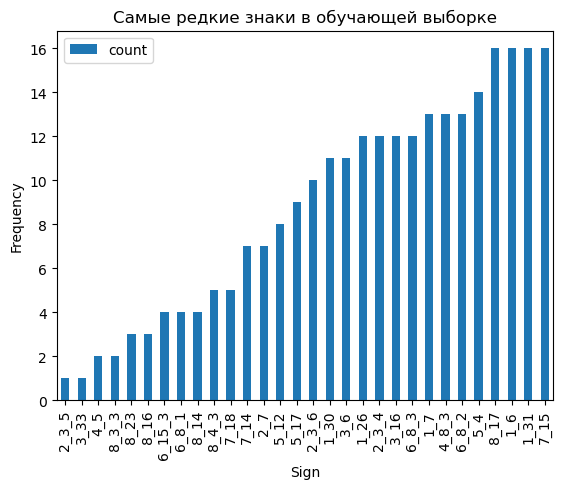

In [20]:
%matplotlib inline
smallest_class = pd.DataFrame(train_signs_distribution_df).sort_values('count')[:30]
# Столбчатая диаграмма
smallest_class.plot(kind='bar')
plt.xlabel("Sign")
plt.ylabel("Frequency")
plt.title("Самые редкие знаки в обучающей выборке")
plt.show()

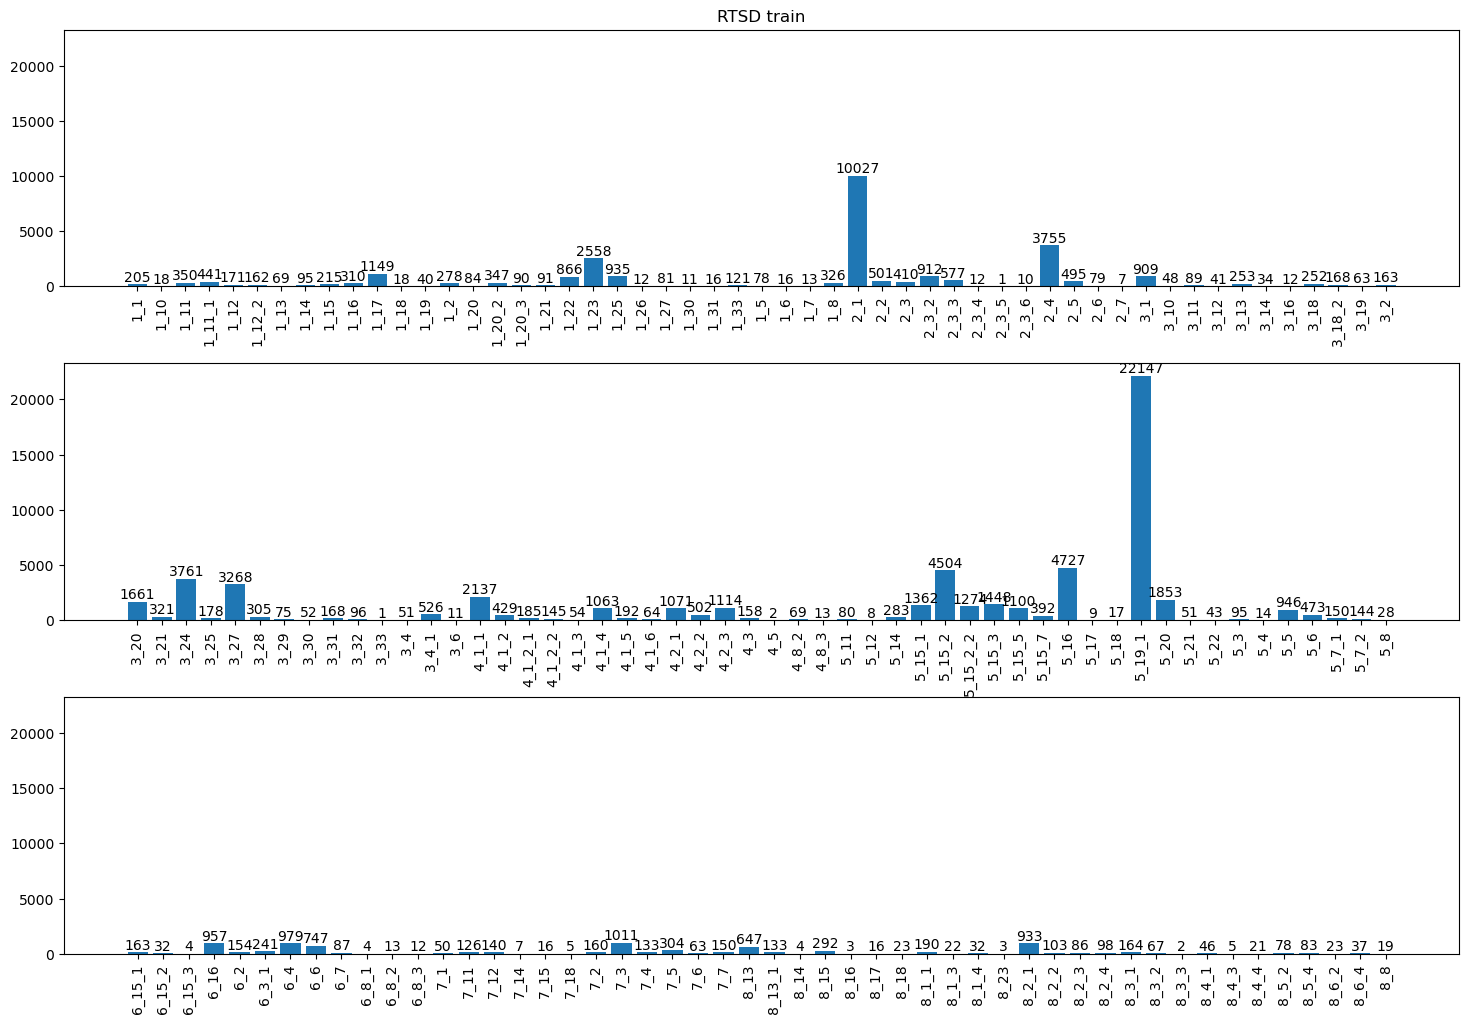

In [21]:
plot1 = train_signs_distribution_df[:53].copy()
plot2 = train_signs_distribution_df[53:105].copy()
plot3 = train_signs_distribution_df[105:].copy()
fig, ax = plt.subplots(nrows=3,ncols=1, sharey=True)
ax1, ax2, ax3 = ax.flatten()
bar1 = ax1.bar(plot1.index, plot1.values)
bar2 = ax2.bar(plot2.index, plot2.values)
bar3 = ax3.bar(plot3.index, plot3.values)
ax1.set_xticks(plot1.index, plot1.index, rotation=90)
ax2.set_xticks(plot2.index, plot2.index, rotation=90)
ax3.set_xticks(plot3.index, plot3.index, rotation=90)
ax1.bar_label(bar1)
ax2.bar_label(bar2)
ax3.bar_label(bar3)
ax1.set_title('RTSD train')
fig.set_size_inches(18,12)
plt.subplots_adjust(hspace=0.3)
plt.show()

Урезанная обучающая выборка

In [22]:
train_reduce_signs_distribution_df = pd.DataFrame(train_anno_reduced.get('annotations'))
train_reduce_signs_distribution_df = train_reduce_signs_distribution_df.merge(pd.DataFrame([label_map]).T.reset_index().set_index(0),
                                                                left_on='category_id', right_index=True)
train_reduce_signs_distribution_df = train_reduce_signs_distribution_df['index'].value_counts().sort_index()
train_reduce_signs_distribution_df.name = 'count'
pd.DataFrame(train_reduce_signs_distribution_df).sort_values('count', ascending=False)

,count
index,
1_1,15
6_15_2,15
5_4,15
5_5,15
5_6,15
...,...
3_2,15
3_20,15
3_21,15


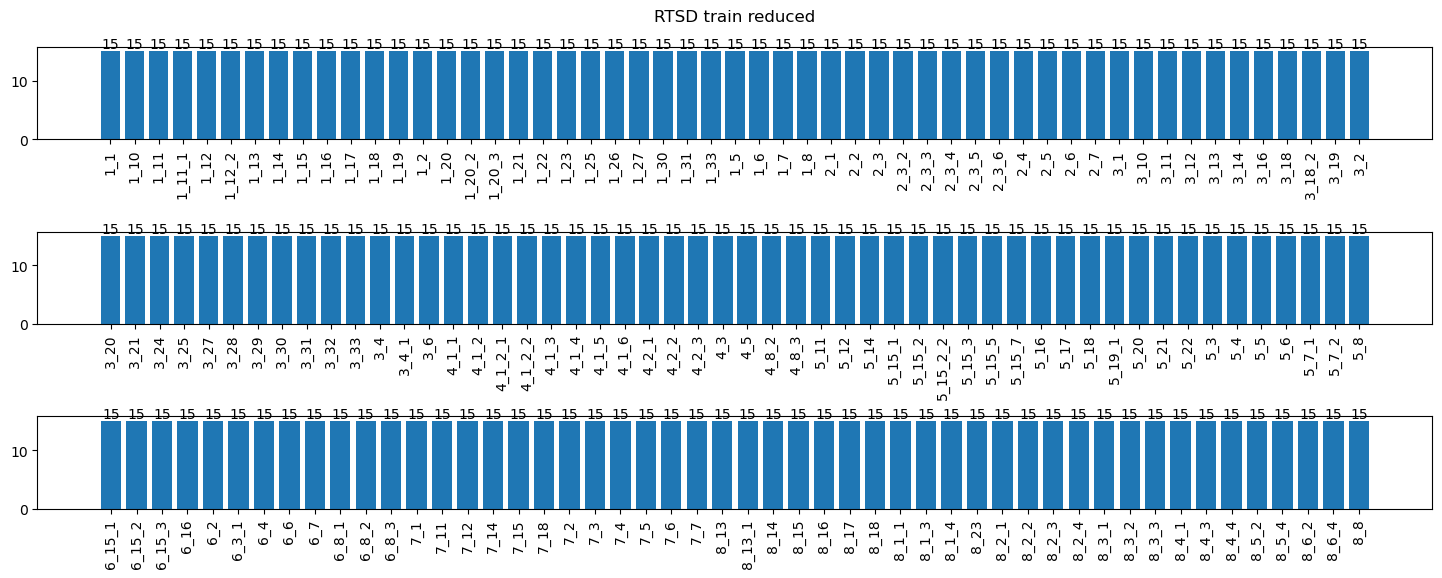

In [23]:
plot1 = train_reduce_signs_distribution_df[:53].copy()
plot2 = train_reduce_signs_distribution_df[53:105].copy()
plot3 = train_reduce_signs_distribution_df[105:].copy()
fig, ax = plt.subplots(nrows=3,ncols=1, sharey=True)
ax1, ax2, ax3 = ax.flatten()
bar1 = ax1.bar(plot1.index, plot1.values)
bar2 = ax2.bar(plot2.index, plot2.values)
bar3 = ax3.bar(plot3.index, plot3.values)
ax1.set_xticks(plot1.index, plot1.index, rotation=90)
ax2.set_xticks(plot2.index, plot2.index, rotation=90)
ax3.set_xticks(plot3.index, plot3.index, rotation=90)
ax1.bar_label(bar1)
ax2.bar_label(bar2)
ax3.bar_label(bar3)
ax1.set_title('RTSD train reduced\n')

fig.set_size_inches(18,6)
plt.subplots_adjust(hspace=1)
plt.show()

Тестовая выборка

In [24]:
val_signs_distribution_df = pd.DataFrame(val_anno.get('annotations'))
val_signs_distribution_df = val_signs_distribution_df.merge(pd.DataFrame([label_map]).T.reset_index().set_index(0),
                                                                left_on='category_id', right_index=True)
val_signs_distribution_df = val_signs_distribution_df['index'].value_counts().sort_index()
val_signs_distribution_df.name = 'count'
pd.DataFrame(val_signs_distribution_df).sort_values('count', ascending=False)

,count
index,
5_19_1,2117
2_1,934
5_16,445
5_15_2,440
3_24,343
...,...
5_12,1
5_17,1
6_8_1,1


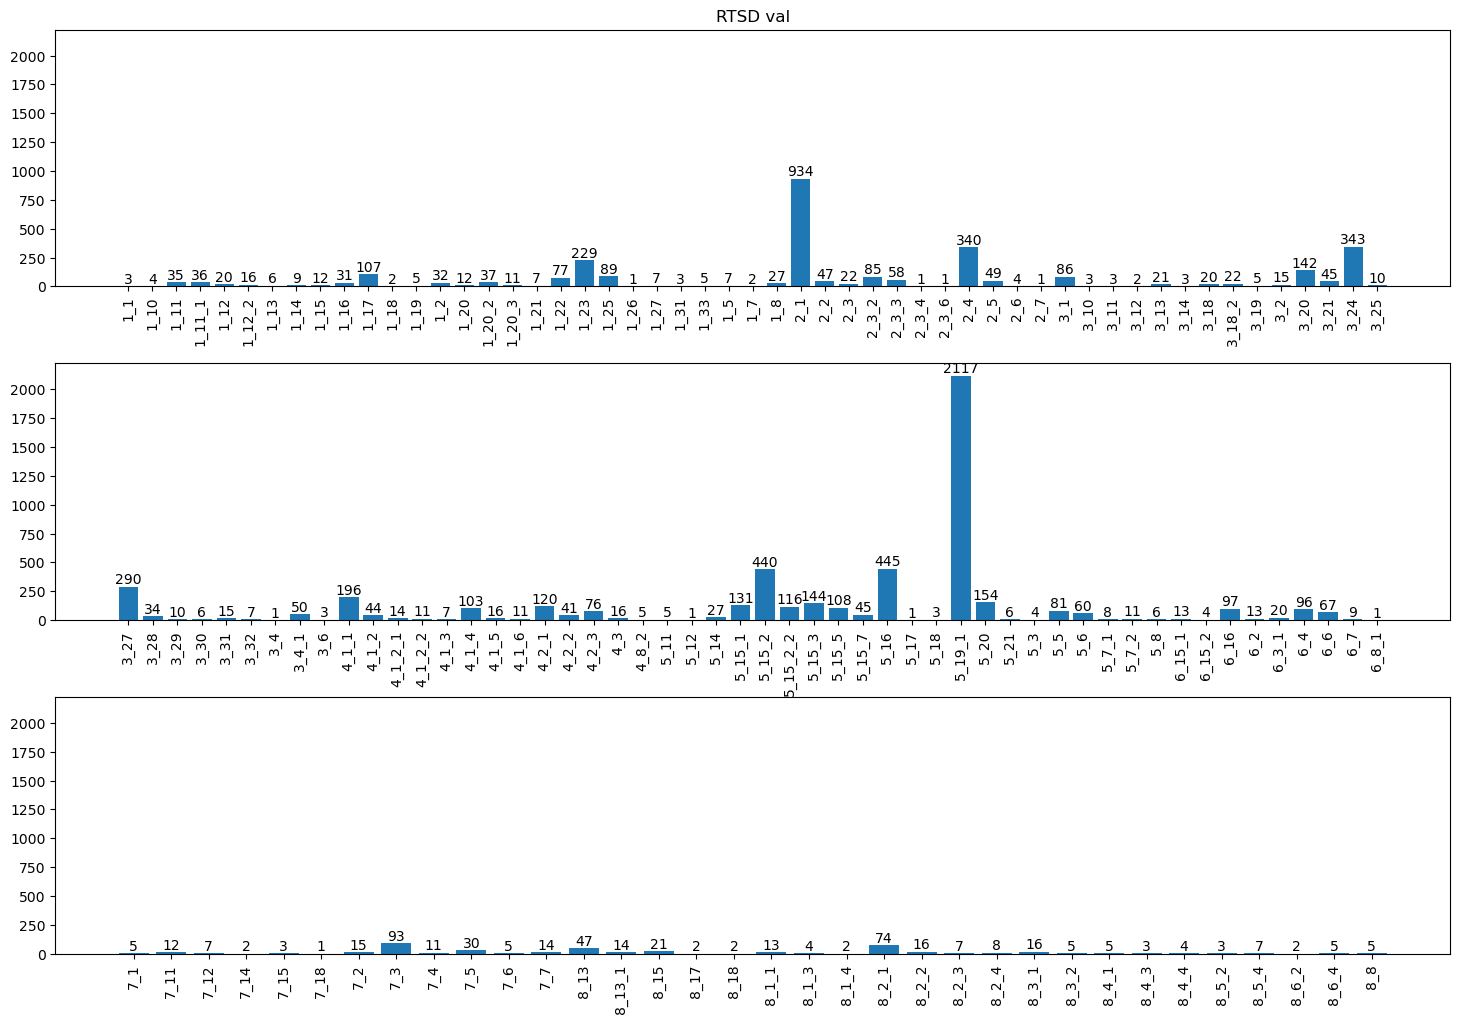

In [25]:
plot1 = val_signs_distribution_df[:53].copy()
plot2 = val_signs_distribution_df[53:105].copy()
plot3 = val_signs_distribution_df[105:].copy()
fig, ax = plt.subplots(nrows=3,ncols=1, sharey=True)
ax1, ax2, ax3 = ax.flatten()
bar1 = ax1.bar(plot1.index, plot1.values)
bar2 = ax2.bar(plot2.index, plot2.values)
bar3 = ax3.bar(plot3.index, plot3.values)
ax1.set_xticks(plot1.index, plot1.index, rotation=90)
ax2.set_xticks(plot2.index, plot2.index, rotation=90)
ax3.set_xticks(plot3.index, plot3.index, rotation=90)
ax1.bar_label(bar1)
ax2.bar_label(bar2)
ax3.bar_label(bar3)
ax1.set_title('RTSD val')
fig.set_size_inches(18,12)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [26]:
signs_distribution = pd.DataFrame(train_signs_distribution_df).merge(pd.DataFrame(val_signs_distribution_df), left_index=True, right_index=True)
signs_distribution.rename(columns={'count_x': 'Train', 'count_y': 'Val'}, inplace=True)
signs_distribution

,Train,Val
index,,
1_1,205,3
1_10,18,4
1_11,350,35
1_11_1,441,36
1_12,171,20
...,...,...
8_5_2,78,3
8_5_4,83,7
8_6_2,23,2


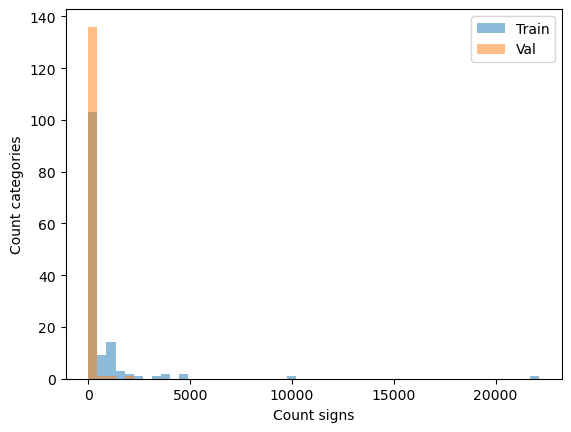

In [27]:
signs_distribution.plot.hist(alpha=0.5, label='Распределение частоты знаков', bins=50);
plt.xlabel("Count signs")
plt.ylabel("Count categories")
plt.show()

## Визуализация датасета с помощью библиотеки *pycocotools*

In [28]:
# загрузка аннотации
train_anno_file = os.path.join(dataset_path, 'train_anno.json')
train_anno_coco = COCO(train_anno_file)

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [29]:
# получение ID нужного знака
train_anno_coco.getCatIds(['5_19_1'])

[7]

In [30]:
# получение ID изображений, содержащих объект с указанным ID знака
train_anno_coco.getImgIds(catIds=[7])

[32768,
 32769,
 32770,
 32771,
 32772,
 32773,
 32774,
 32776,
 32777,
 32778,
 32779,
 17,
 18,
 19,
 20,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 32802,
 32803,
 32804,
 32805,
 32806,
 32807,
 32808,
 32809,
 32810,
 32811,
 32813,
 32814,
 56,
 57,
 58,
 64,
 65,
 66,
 67,
 68,
 71,
 72,
 73,
 74,
 75,
 76,
 79,
 80,
 81,
 87,
 88,
 89,
 90,
 32857,
 32859,
 32860,
 32861,
 32862,
 32863,
 32864,
 32865,
 32867,
 32868,
 101,
 102,
 32869,
 32873,
 32874,
 32875,
 32876,
 32877,
 32878,
 32879,
 32880,
 32881,
 32882,
 32883,
 32897,
 32899,
 32900,
 32901,
 32902,
 32903,
 32904,
 32905,
 32906,
 205,
 32975,
 208,
 209,
 210,
 32976,
 32977,
 32979,
 32980,
 32981,
 32982,
 32983,
 32991,
 32992,
 32993,
 32996,
 32997,
 32998,
 32999,
 33000,
 33001,
 33002,
 33003,
 33004,
 33005,
 33006,
 33007,
 33008,
 33009,
 33010,
 33011,
 33022,
 33023,
 33024,
 33025,
 33026,
 33027,
 33028,
 33029,
 33030,
 33031,
 33032,
 33033,
 33034,
 33035,
 33036,
 33037,
 33038,
 33039,
 3

In [31]:
# получение ID аннотаций для указанного ID изображения
annotation_ids = train_anno_coco.getAnnIds(imgIds=24666)
annotation_ids

[41142, 41143, 41144, 41145, 41146, 41147, 41148]

In [32]:
# получение ID аннотаций для указанных ID изображения и ID категории
annotation_ids = train_anno_coco.getAnnIds(imgIds=24666, catIds=[7])
annotation_ids

[41143, 41144, 41145, 41146, 41147]

In [33]:
# просмотр аннотации
train_anno_coco.anns[71808]

{'id': 71808,
 'image_id': 38918,
 'category_id': 7,
 'area': 5124,
 'bbox': [1054, 147, 61, 84],
 'iscrowd': 0}

In [34]:
def pycocotools_visualizer(image_id, category_id = None):
    '''функция по выводу изображения с указанным ID
    и визуализацией аннотаций с выбранными ID категорий (список)
    Если ID категорий не указаны - выводятся все аннотации для изображения'''
    if category_id:
        annotation_ids = train_anno_coco.getAnnIds(imgIds=image_id, catIds=category_id)
    else:
        annotation_ids = train_anno_coco.getAnnIds(imgIds=image_id)
            
    # загрузка аннотаций в список
    anns = train_anno_coco.loadAnns(annotation_ids)

    # путь к изображению и его название
    images_path = dataset_path
    image_name = train_anno_coco.loadImgs(image_id)[0].get('file_name')
    image = Image.open(os.path.join(images_path, image_name))
    
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 10)
    
    # Draw boxes and add label to each box
    for ann in anns:
        box = ann['bbox']
        bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=1, edgecolor="yellow", facecolor="none")
        ax.add_patch(bb)
    
    ax.imshow(image)
    plt.show()

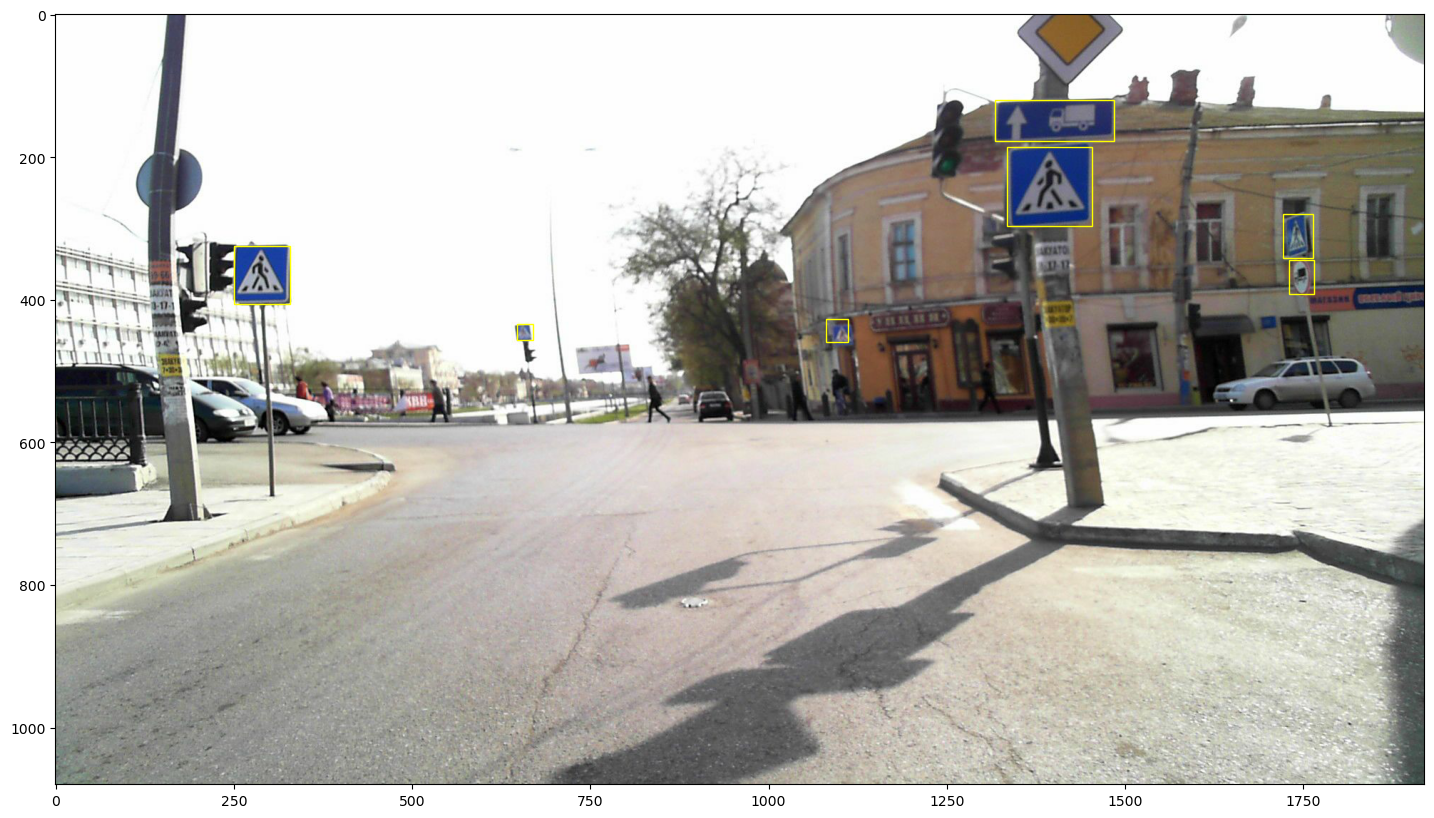

In [35]:
# вывод изображения и рамок для всех знаков
pycocotools_visualizer(24666)

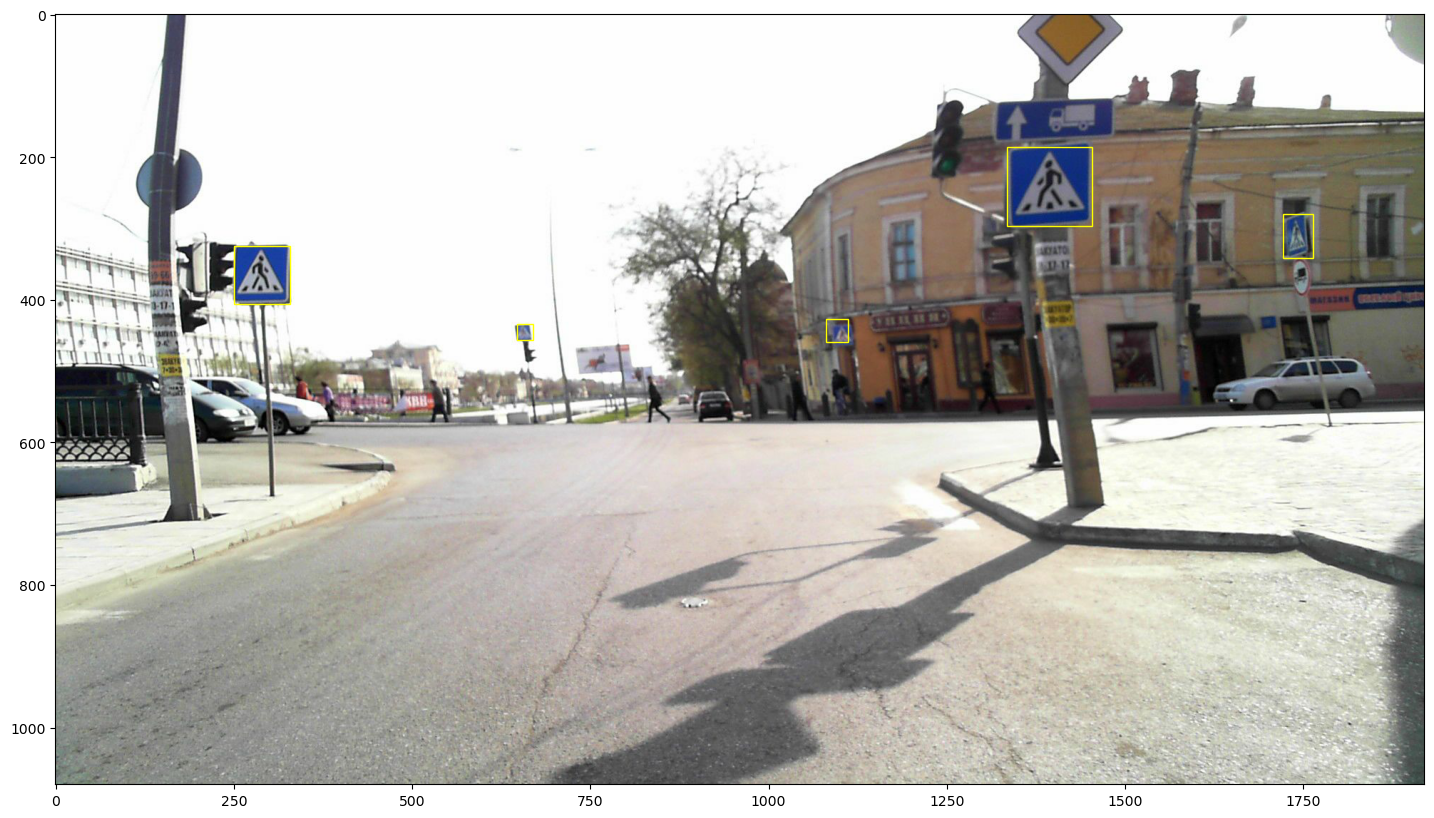

In [36]:
# вывод изображения и рамок для выбранных знаков
pycocotools_visualizer(24666, [7])

## Визуализация датасета с помощью библиотеки *fiftyone*

In [37]:
# загрузка датасета

# The directiry containing the source images
data_path = dataset_path      # можно не указывать, если в JSON путь совпадает

# The path yo the COCO labels JSON file
labels_file = "train_anno.json"
labels_path = os.path.join(dataset_path, labels_file)


# Import the dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=data_path,
    labels_path=labels_path
)

 100% |█████████████| 54188/54188 [44.6s elapsed, 0s remaining, 1.3K samples/s]      


In [38]:
dataset

Name:        2024.08.22.00.27.45
Media type:  image
Num samples: 54188
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [39]:
# Визуализация набора данных
session = fo.launch_app(dataset)

In [40]:
# Использование агрегатов с помощью API для получения статистики о наборе данных
# Количество обнаружений для каждой категории
dataset.count_values("detections.detections.label")

{'7_15': 16,
 '3_18_2': 168,
 '1_11': 350,
 '8_15': 292,
 '4_3': 158,
 '4_2_1': 1071,
 '8_3_2': 67,
 '8_13': 647,
 '3_11': 89,
 '2_2': 501,
 '1_8': 326,
 '6_7': 87,
 '4_1_2_2': 145,
 '1_7': 13,
 '1_33': 121,
 '3_13': 253,
 '5_12': 8,
 '4_1_4': 1063,
 '7_12': 140,
 '3_4_1': 526,
 '3_16': 12,
 '1_5': 78,
 '6_6': 747,
 '8_3_3': 2,
 '4_5': 2,
 '8_4_4': 21,
 '1_25': 935,
 '5_15_1': 1362,
 '8_2_2': 103,
 '7_6': 63,
 '2_1': 10027,
 '7_3': 1011,
 '7_7': 150,
 '4_1_5': 192,
 '5_15_3': 1448,
 '6_2': 154,
 '3_25': 178,
 '6_16': 957,
 '2_3_4': 12,
 '5_20': 1853,
 '1_18': 18,
 '1_30': 11,
 '8_6_2': 23,
 '5_16': 4727,
 '2_3_3': 577,
 '3_12': 41,
 '8_2_1': 933,
 '3_18': 252,
 '3_10': 48,
 '1_13': 69,
 '5_14': 283,
 '5_15_2': 4504,
 '8_4_3': 5,
 '8_14': 4,
 '3_1': 909,
 '1_19': 40,
 '3_31': 168,
 '1_20': 84,
 '3_30': 52,
 '5_7_1': 150,
 '8_5_2': 78,
 '5_15_7': 392,
 '5_11': 80,
 '7_18': 5,
 '1_16': 310,
 '8_6_4': 37,
 '4_2_3': 1114,
 '4_1_6': 64,
 '1_10': 18,
 '5_17': 9,
 '7_1': 50,
 '8_23': 3,
 '2_7'

In [41]:
# взаимодействие с набором данных через представление
# сортировка по выборкам с наибольшим количеством объектов
from fiftyone import ViewField as F

# Sort samples with the most objects first
obj_count_view = dataset.sort_by(F("detections.detections").length(), reverse=True)
session.view = obj_count_view

In [42]:
session = fo.launch_app(dataset)

### Маппинг кодов знаков на названия знаков

In [43]:
labels_names_map = {}
labels_names_map['1_1'] = 'Железнодорожный переезд со шлагбаумом'
labels_names_map['1_2'] = 'Железнодорожный переезд без шлагбаума'
labels_names_map['1_5'] = 'Пересечение с трамвайной линией'
labels_names_map['1_6'] = 'Пересечение равнозначных дорог'
labels_names_map['1_7'] = 'Пересечение с круговым движением'
labels_names_map['1_8'] = 'Светофорное регулирование'
labels_names_map['1_10'] = 'Выезд на набережную'
labels_names_map['1_11'] = 'Опасный поворот (направо)'
labels_names_map['1_11_1'] = 'Опасный поворот (налево)'
labels_names_map['1_12'] = 'Опасные повороты (первый направо)'
labels_names_map['1_12_2'] = 'Опасные повороты (первый налево)'
labels_names_map['1_13'] = 'Крутой спуск'
labels_names_map['1_14'] = 'Крутой подъём'
labels_names_map['1_15'] = 'Скользкая дорога'
labels_names_map['1_16'] = 'Неровная дорога'
labels_names_map['1_17'] = 'Искусственная неровность'
labels_names_map['1_18'] = 'Выброс гравия'
labels_names_map['1_19'] = 'Опасная обочина'
labels_names_map['1_20'] = 'Сужение дороги (с обеих сторон)'
labels_names_map['1_20_2'] = 'Сужение дороги (с правой стороны)'
labels_names_map['1_20_3'] = 'Сужение дороги (с левой стороны)'
labels_names_map['1_21'] = 'Двустороннее движение'
labels_names_map['1_22'] = 'Пешеходный переход'
labels_names_map['1_23'] = 'Дети'
labels_names_map['1_25'] = 'Дорожные работы'
labels_names_map['1_26'] = 'Перегон скота'
labels_names_map['1_27'] = 'Дикие животные'
labels_names_map['1_30'] = 'Низколетящие саолёты'
labels_names_map['1_31'] = 'Тоннель'
labels_names_map['1_33'] = 'Прочие опасности'
labels_names_map['2_1'] = 'Главная дорога'
labels_names_map['2_2'] = 'Конец главной дороги'
labels_names_map['2_3'] = 'Пересечение со второстепенной дорогой'
labels_names_map['2_3_2'] = 'Примыкание второстепенной дороги (справа)'
labels_names_map['2_3_3'] = 'Примыкание второстепенной дороги (слева)'
labels_names_map['2_3_4'] = 'Примыкание второстепенной дороги (справа)'
labels_names_map['2_3_5'] = 'Примыкание второстепенной дороги (слева)'
labels_names_map['2_3_6'] = 'Примыкание второстепенной дороги (справа)'
labels_names_map['2_4'] = 'Уступите дорогу'
labels_names_map['2_5'] = 'Движение без остановки запрещено'
labels_names_map['2_6'] = 'Преимущество встречного движения'
labels_names_map['2_7'] = 'Преимущество перед встречным движением'
labels_names_map['3_1'] = 'Въезд запрещён'
labels_names_map['3_2'] = 'Движение запрещено'
labels_names_map['3_4'] = 'Движение грузовых автомобилей запрещено (более указанной массы)'
labels_names_map['3_4_1'] = 'Движение грузовых автомобилей запрещено (более 3,5 т)'
labels_names_map['3_6'] = 'Движение тракторов запрещено'
labels_names_map['3_10'] = 'Движение пешеходов запрещено'
labels_names_map['3_11'] = 'Ограничение массы'
labels_names_map['3_12'] = 'Ограничение массы, приходящейся на ось транспортного средства'
labels_names_map['3_13'] = 'Ограничение высоты'
labels_names_map['3_14'] = 'Ограничение ширины'
labels_names_map['3_16'] = 'Ограничение минимальной дистанции'
labels_names_map['3_18'] = 'Поворот направо запрещён'
labels_names_map['3_18_2'] = 'Поворот налево запрещён'
labels_names_map['3_19'] = 'Разворот запрещён'
labels_names_map['3_20'] = 'Обгон запрещён'
labels_names_map['3_21'] = 'Конец зоны запрещения обгона'
labels_names_map['3_24'] = 'Ограничение максимальной скорости'
labels_names_map['3_25'] = 'Конец зоны ограничения максимальной скорости'
labels_names_map['3_27'] = 'Остановка запрещена'
labels_names_map['3_28'] = 'Стоянка запрещена'
labels_names_map['3_29'] = 'Стоянка запрещена по нечётным числам месяца'
labels_names_map['3_30'] = 'Стоянка запрещена по чётным числам месяца'
labels_names_map['3_31'] = 'Конец зоны всех ограничений'
labels_names_map['3_32'] = 'Движение транспортных средств с опасными грузами запрещено'
labels_names_map['3_33'] = 'Движение транспортных средств с взрывчатыми и легковоспламеняющимися грузами запрещено'
labels_names_map['4_1_1'] = 'Движение прямо'
labels_names_map['4_1_2'] = 'Движение направо'
labels_names_map['4_1_2_1'] = 'Движение направо (прямая стрелка)'
labels_names_map['4_1_2_2'] = 'Движение налево (прямая стрелка)'
labels_names_map['4_1_3'] = 'Движение налево'
labels_names_map['4_1_4'] = 'Движение прямо или направо'
labels_names_map['4_1_5'] = 'Движение прямо или налево'
labels_names_map['4_1_6'] = 'Движение направо или налево'
labels_names_map['4_2_1'] = 'Объезд препятствия справа'
labels_names_map['4_2_2'] = 'Объезд препятствия слева'
labels_names_map['4_2_3'] = 'Объезд препятствия справа или слева'
labels_names_map['4_3'] = 'Круговое движение'
labels_names_map['4_5'] = 'Пешеходная дорожка'
labels_names_map['4_8_2'] = 'Направление движения транспортных средств с опасными грузами (направо)'
labels_names_map['4_8_3'] = 'Направление движения транспортных средств с опасными грузами (налево)'
labels_names_map['5_3'] = 'Дорога для автомобилей'
labels_names_map['5_4'] = 'Конец дороги для автомобилей'
labels_names_map['5_5'] = 'Дорога с односторонним движением'
labels_names_map['5_6'] = 'Конец дороги с односторонним движением'
labels_names_map['5_7_1'] = 'Выезд на дорогу с односторонним движением (направо)'
labels_names_map['5_7_2'] = 'Выезд на дорогу с односторонним движением (налево)'
labels_names_map['5_8'] = 'Реверсивное движение'
labels_names_map['5_11'] = 'Дорога с полосой для маршрутных транспортных средств'
labels_names_map['5_12'] = 'Конец дороги с полосой для маршрутных транспортных средств'
labels_names_map['5_14'] = 'Полоса для маршрутных транспортных средств'
labels_names_map['5_15_1'] = 'Направления движения по полосам'
labels_names_map['5_15_2'] = 'Направления движения по полосе'
labels_names_map['5_15_2_2'] = 'Направления движения по полосе (в 2 полосы)'
labels_names_map['5_15_3'] = 'Начало полосы'
labels_names_map['5_15_5'] = 'Конец полосы'
labels_names_map['5_15_7'] = 'Направление движения по полосе'
labels_names_map['5_16'] = 'Место остановки автобуса и (или) троллейбуса'
labels_names_map['5_17'] = 'Место остановки трамвая'
labels_names_map['5_18'] = 'Место стоянки легковых такси'
labels_names_map['5_19_1'] = 'Пешеходный переход'
labels_names_map['5_20'] = 'Искусственная неровность'
labels_names_map['5_21'] = 'Жилая зона'
labels_names_map['5_22'] = 'Конец жилой зоны'
labels_names_map['6_2'] = 'Рекомендуемая скорость'
labels_names_map['6_3_1'] = 'Место для разворота'
labels_names_map['6_4'] = 'Парковка (парковочное место)'
labels_names_map['6_6'] = 'Подземный пешеходный переход'
labels_names_map['6_7'] = 'Надземный пешеходный переход'
labels_names_map['6_8_1'] = 'Тупик (прямо)'
labels_names_map['6_8_2'] = 'Тупик (направо)'
labels_names_map['6_8_3'] = 'Тупик (налево)'
labels_names_map['6_15_1'] = 'Направление движения для грузовых автомобилей (прямо)'
labels_names_map['6_15_2'] = 'Направление движения для грузовых автомобилей (направо)'
labels_names_map['6_15_3'] = 'Направление движения для грузовых автомобилей (налево)'
labels_names_map['6_16'] = 'Стоп-линия'
labels_names_map['7_1'] = 'Пункт первой медицинской помощи'
labels_names_map['7_2'] = 'Больница'
labels_names_map['7_3'] = 'Автозаправочная станция'
labels_names_map['7_4'] = 'Техническое обслуживание автомобилей'
labels_names_map['7_5'] = 'Мойка автомобилей'
labels_names_map['7_6'] = 'Телефон'
labels_names_map['7_7'] = 'Пункт питания'
labels_names_map['7_11'] = 'Место отдыха'
labels_names_map['7_12'] = 'Пост ДПС'
labels_names_map['7_14'] = 'Пункт транспортного контроля'
labels_names_map['7_15'] = 'Зона приёма радиостанции, передающей информацию о дорожном движении'
labels_names_map['7_18'] = 'Туалет'
labels_names_map['8_1_1'] = 'Расстояние до объекта'
labels_names_map['8_1_3'] = 'Расстояние до объекта (в стороне от дороги справа)'
labels_names_map['8_1_4'] = 'Расстояние до объекта (в стороне от дороги слева)'
labels_names_map['8_2_1'] = 'Зона действия (протяженность)'
labels_names_map['8_2_2'] = 'Зона действия'
labels_names_map['8_2_3'] = 'Зона действия (конец зоны действия)'
labels_names_map['8_2_4'] = 'Зона действия (нахождение в зоне действия)'
labels_names_map['8_3_1'] = 'Направления действия (направо)'
labels_names_map['8_3_2'] = 'Направления действия (налево)'
labels_names_map['8_3_3'] = 'Направления действия (направо и налево)'
labels_names_map['8_4_1'] = 'Вид транспортного средства (грузовой автомобиль более 3,5 т)'
labels_names_map['8_4_3'] = 'Вид транспортного средства (легковой автомобиль)'
labels_names_map['8_4_4'] = 'Вид транспортного средства (автобус)'
labels_names_map['8_5_2'] = 'Рабочие дни'
labels_names_map['8_5_4'] = 'Время действия'
labels_names_map['8_6_2'] = 'Способ постановки транспортного средства на стоянку (в заездом на обочину)'
labels_names_map['8_6_4'] = 'Способ постановки транспортного средства на стоянку (перпендикулярно обочине)'
labels_names_map['8_8'] = 'Платные услуги'
labels_names_map['8_13'] = 'Направление главной дороги'
labels_names_map['8_13_1'] = 'Направление главной дороги (кольцо)'
labels_names_map['8_14'] = 'Полоса движения'
labels_names_map['8_15'] = 'Слепые пешеходы'
labels_names_map['8_16'] = 'Влажное покрытие'
labels_names_map['8_17'] = 'Инвалиды'
labels_names_map['8_18'] = 'Кроме инвалидов'
labels_names_map['8_23'] = 'Фотовидеофиксация'

with open(os.path.join(data_prepared_path, 'labels_names_map.json'), 'w') as f:
    json.dump(labels_names_map, f)
f.close()

labels_names_map

{'1_1': 'Железнодорожный переезд со шлагбаумом',
 '1_2': 'Железнодорожный переезд без шлагбаума',
 '1_5': 'Пересечение с трамвайной линией',
 '1_6': 'Пересечение равнозначных дорог',
 '1_7': 'Пересечение с круговым движением',
 '1_8': 'Светофорное регулирование',
 '1_10': 'Выезд на набережную',
 '1_11': 'Опасный поворот (направо)',
 '1_11_1': 'Опасный поворот (налево)',
 '1_12': 'Опасные повороты (первый направо)',
 '1_12_2': 'Опасные повороты (первый налево)',
 '1_13': 'Крутой спуск',
 '1_14': 'Крутой подъём',
 '1_15': 'Скользкая дорога',
 '1_16': 'Неровная дорога',
 '1_17': 'Искусственная неровность',
 '1_18': 'Выброс гравия',
 '1_19': 'Опасная обочина',
 '1_20': 'Сужение дороги (с обеих сторон)',
 '1_20_2': 'Сужение дороги (с правой стороны)',
 '1_20_3': 'Сужение дороги (с левой стороны)',
 '1_21': 'Двустороннее движение',
 '1_22': 'Пешеходный переход',
 '1_23': 'Дети',
 '1_25': 'Дорожные работы',
 '1_26': 'Перегон скота',
 '1_27': 'Дикие животные',
 '1_30': 'Низколетящие саолёты',
